# HR Analytics Project

##  Identify the best source of recruitment for a tech startup, based on previous data of candidate sources and recruitment strategies

In [3]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")
from scipy.cluster.hierarchy import linkage

In [5]:
# Loading CSV files into pandas DataFrames
df= pd.read_csv("Recruitment_Data_updated.csv")

In [7]:
# Checking the first few rows of the DataFrame
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.000707,2.976686,0.604739,Applied Online
1,-0.019452,2.989157,0.396567,NaN
2,-0.009998,2.993355,0.206242,Applied Online
3,-0.003004,1.989966,-0.475037,NaN
4,-0.025405,3.016559,0.345470,Campus


In [9]:
# Checking the shape of the DataFrame
df.shape

(107354, 4)

In [11]:
# Checking the information of the DataFrame
df.info

<bound method DataFrame.info of         attrition  performance_rating  sales_quota_pct recruiting_source
0        0.000707            2.976686         0.604739    Applied Online
1       -0.019452            2.989157         0.396567               NaN
2       -0.009998            2.993355         0.206242    Applied Online
3       -0.003004            1.989966        -0.475037               NaN
4       -0.025405            3.016559         0.345470            Campus
...           ...                 ...              ...               ...
107349   0.002813            3.003288         1.041518               NaN
107350   0.998179            2.997723         1.349780               NaN
107351  -0.016202            2.992603         0.791637               NaN
107352  -0.023847            2.005391         0.749299               NaN
107353  -0.009020            1.988047         2.896500    Applied Online

[107354 rows x 4 columns]>

In [13]:
# Checking data types
df.dtypes

attrition             float64
performance_rating    float64
sales_quota_pct       float64
recruiting_source      object
dtype: object

In [15]:
# Summary statistics
df.describe

<bound method NDFrame.describe of         attrition  performance_rating  sales_quota_pct recruiting_source
0        0.000707            2.976686         0.604739    Applied Online
1       -0.019452            2.989157         0.396567               NaN
2       -0.009998            2.993355         0.206242    Applied Online
3       -0.003004            1.989966        -0.475037               NaN
4       -0.025405            3.016559         0.345470            Campus
...           ...                 ...              ...               ...
107349   0.002813            3.003288         1.041518               NaN
107350   0.998179            2.997723         1.349780               NaN
107351  -0.016202            2.992603         0.791637               NaN
107352  -0.023847            2.005391         0.749299               NaN
107353  -0.009020            1.988047         2.896500    Applied Online

[107354 rows x 4 columns]>

In [17]:
# Checking for missing values in the DataFrame
100*df.isnull().mean()

attrition              0.000000
performance_rating     0.000000
sales_quota_pct        0.000000
recruiting_source     46.203216
dtype: float64

In [19]:
# Group by 'recruiting_source' and calculate average sales and attrition
grouped_data = df.groupby('recruiting_source').agg(
    avg_sales=('sales_quota_pct', 'mean'),
    avg_attrition=('attrition', 'mean')
).reset_index()

In [21]:
print(grouped_data)

  recruiting_source  avg_sales  avg_attrition
0    Applied Online   1.080959       0.213370
1            Campus   1.076408       0.215109
2          Referral   1.075538       0.214920
3       Search Firm   1.103426       0.208177


In [23]:
#  Sort the data to find the best performing sources
best_sources = grouped_data.sort_values(by=['avg_sales', 'avg_attrition'], ascending=[False, True])

In [25]:
print("\nTop-performing sources with high sales and low attrition:")
print(best_sources)


Top-performing sources with high sales and low attrition:
  recruiting_source  avg_sales  avg_attrition
3       Search Firm   1.103426       0.208177
0    Applied Online   1.080959       0.213370
1            Campus   1.076408       0.215109
2          Referral   1.075538       0.214920


#### Conclusion
Search Firm emerges as the most successful recruitment source, balancing high sales with low attrition.

Applied Online is another solid performer with strong sales and manageable attrition rates.

Campus and Referral recruits, though slightly lower in sales, still contribute positively but may need more focus on retention strategies.


In [28]:
# Plot the results for better visualization
import matplotlib.pyplot as plt
import seaborn as sns


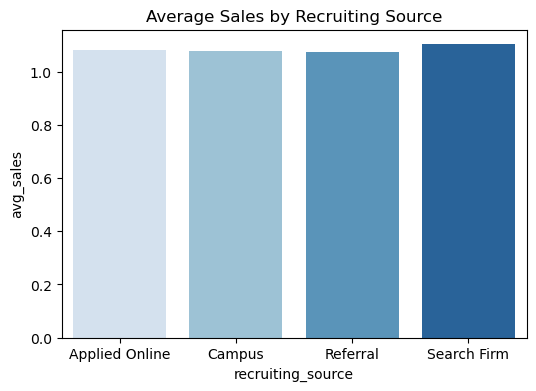

In [30]:
# Bar plot for average sales per recruiting source
plt.figure(figsize=(6, 4))
sns.barplot(x='recruiting_source', y='avg_sales', data=grouped_data, palette='Blues')
plt.title('Average Sales by Recruiting Source')
plt.show()

#### Insights from Average Sales by Recruiting Source:
Search Firm:

Observation: The highest average sales among all sources.
Insight: This source is effective in bringing in high-performing employees. It could be prioritized for hiring when sales performance is a critical factor.
Applied Online:

Observation: Sales performance is slightly lower than Search Firm but still strong.
Insight: Online applications are a reliable source for talent, suggesting that maintaining or expanding this channel may yield good results.
Campus:

Observation: Average sales are slightly lower than those from the online channel.
Insight: Although campus hires might require time to grow, they still contribute positively to sales.
Referral:

Observation: Similar performance to Campus hires but slightly below.
Insight: Referral-based hiring performs decently, but efforts to improve the onboarding or engagement of referral candidates could help boost their output.

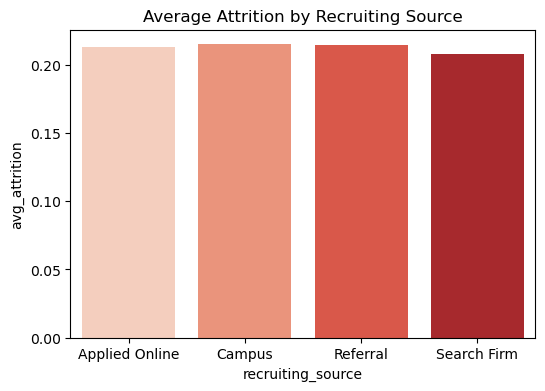

In [33]:
# Bar plot for average attrition per recruiting source
plt.figure(figsize=(6,4))
sns.barplot(x='recruiting_source', y='avg_attrition', data=grouped_data, palette='Reds')
plt.title('Average Attrition by Recruiting Source')
plt.show()

#### Insights from Average Attrition by Recruiting Source:
Search Firm:

Observation: This source has the lowest attrition rate among all sources.
Insight: Employees recruited through Search Firms tend to stay longer, indicating higher job satisfaction or better alignment with company expectations.
Applied Online:

Observation: Moderate attrition rate, slightly higher than Search Firm.
Insight: Candidates hired online may not always align with the company's expectations, leading to moderate turnover.
Campus and Referral:

Observation: Both show similar attrition rates, but slightly higher than Search Firm.
Insight: Campus hires and referrals may need better retention strategies, such as improved onboarding or career development programs, to reduce turnover.

In [36]:
# Sort and print the best sources (high sales, low attrition)
best_sources = grouped_data.sort_values(by=['avg_sales', 'avg_attrition'], ascending=[False, True])
print("\nTop-performing sources (High Sales, Low Attrition):")
print(best_sources)


Top-performing sources (High Sales, Low Attrition):
  recruiting_source  avg_sales  avg_attrition
3       Search Firm   1.103426       0.208177
0    Applied Online   1.080959       0.213370
1            Campus   1.076408       0.215109
2          Referral   1.075538       0.214920


In [38]:
# Find Best Performing Sources (High Sales, Low Attrition)
best_sources = grouped_data.sort_values(by=['avg_sales', 'avg_attrition'], ascending=[False, True])
print("\nBest Performing Recruiting Sources (High Sales, Low Attrition):")
print(best_sources)



Best Performing Recruiting Sources (High Sales, Low Attrition):
  recruiting_source  avg_sales  avg_attrition
3       Search Firm   1.103426       0.208177
0    Applied Online   1.080959       0.213370
1            Campus   1.076408       0.215109
2          Referral   1.075538       0.214920


In [40]:
# Descriptive Statistics for Numeric Columns
print("\nDescriptive Statistics for Numeric Columns:")
print(df[['sales_quota_pct', 'attrition']].describe())



Descriptive Statistics for Numeric Columns:
       sales_quota_pct      attrition
count    107354.000000  107354.000000
mean          1.082606       0.213198
std           0.710279       0.409639
min          -0.739909      -0.042386
25%           0.589342      -0.004684
50%           1.069800       0.003484
75%           1.532299       0.016809
max           3.701694       1.038685


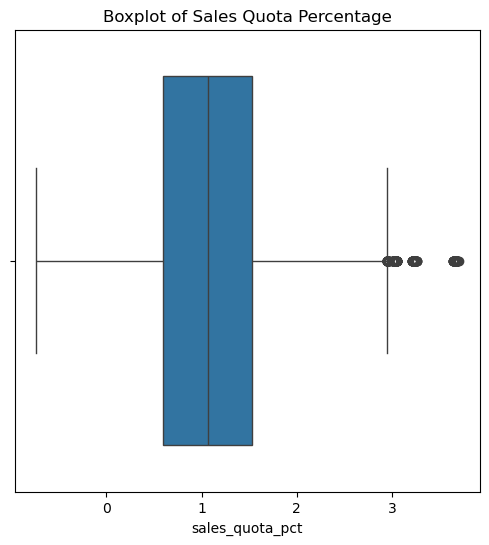

In [42]:
# Detect and Handle Outliers (Using Boxplots)

# Boxplot for 'sales_quota_pct'
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='sales_quota_pct')
plt.title('Boxplot of Sales Quota Percentage')
plt.show()

#### Insights from the Boxplot of Sales Quota Percentage:

Median Value: The median (central line inside the box) suggests that half the employees have achieved at least 1.0 quota percentage.
This indicates that many employees are meeting or surpassing their target quotas.


Interquartile Range (IQR): The box length (IQR) represents the middle 50% of data points.
Employees’ sales quota percentage is mostly between 0.5 and 1.5. This is the core range for the majority.


Whiskers and Outliers: The whiskers extend up to around 0 and 2.5, suggesting that most employees fall within this range without being flagged as outliers.
Outliers are visible beyond the 2.5 threshold, indicating that a few employees have exceptionally high sales performance.


Outliers’ Implication: Outliers (above 2.5) might represent top-performing employees who significantly exceed their quota. These individuals could be identified and rewarded for their exceptional contribution.
However, they also warrant investigation to understand if targets are being set too low for some roles, making overperformance common.


In [45]:
# Correlation Analysis between 'sales_quota_pct' and 'attrition'
correlation = df[['sales_quota_pct', 'attrition']].corr()
print("\nCorrelation between Sales Quota and Attrition:")
print(correlation)


Correlation between Sales Quota and Attrition:
                 sales_quota_pct  attrition
sales_quota_pct          1.00000   -0.03858
attrition               -0.03858    1.00000


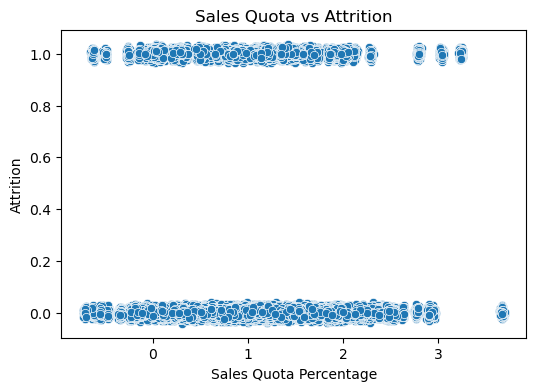

In [47]:
# Scatter Plot to visualize the correlation
plt.figure(figsize=(6, 4))
sns.scatterplot(x='sales_quota_pct', y='attrition', data=df)
plt.title('Sales Quota vs Attrition')
plt.xlabel('Sales Quota Percentage')
plt.ylabel('Attrition')
plt.show()

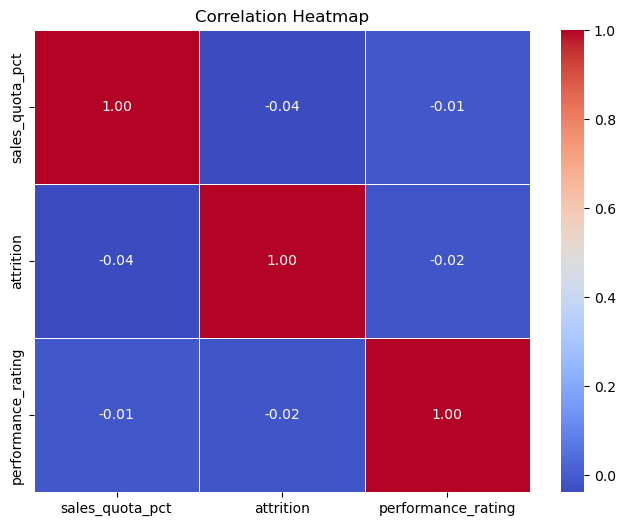

In [49]:
# Calculate the correlation matrix
corr_matrix = df[['sales_quota_pct', 'attrition', 'performance_rating']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Customize the plot
plt.title('Correlation Heatmap', fontsize=12)
plt.show()

#### These observations provide subtle insights into the relationships between sales performance, employee retention, and performance ratings. Let's break down what each point could mean:

1. As sales quota achievement increases, attrition slightly decreases.

2. Higher performance ratings are very slightly associated with lower attrition.

3. Minimal negative relationship between sales quota achievement and performance ratings.

In [52]:
# Create a Pivot Table (Sales Quota vs Attrition by Recruiting Source)
pivot_table = df.pivot_table(values=['sales_quota_pct', 'attrition'],
                             index='recruiting_source',
                             aggfunc='mean').reset_index()

print("\nPivot Table (Average Sales Quota and Attrition by Recruiting Source):")
print(pivot_table)


Pivot Table (Average Sales Quota and Attrition by Recruiting Source):
  recruiting_source  attrition  sales_quota_pct
0    Applied Online   0.213370         1.080959
1            Campus   0.215109         1.076408
2          Referral   0.214920         1.075538
3       Search Firm   0.208177         1.103426


#### Insights:
1. Attrition Rate by Recruiting Source: Campus recruits have the highest average attrition (0.215), closely followed by Referral (0.214).
Applied Online recruits also have a slightly high attrition (0.213), indicating that individuals hired through these channels may not stay as long.
Search Firm recruits have the lowest attrition rate (0.208), suggesting that this recruiting source yields employees with better retention.

2. Sales Quota Achievement: Search Firm hires show the highest sales quota percentage (1.103), indicating top performance in meeting or exceeding sales goals.
Applied Online, Campus, and Referral recruits perform comparably with average sales quota percentages between 1.075 and 1.08.

3. Performance vs. Retention: While Search Firm recruits have the lowest attrition and highest sales quota, other sources (especially Campus and Referral) struggle with slightly higher attrition despite similar quota percentages.
This suggests that employees hired through Search Firms not only perform better but also stay longer, which could make this a preferred recruiting channel for key roles.
